# 시계열의 패턴과 예측

파일 로딩

In [4]:
#!skip_error
import pandas as pd
beer = pd.read_excel('beer.xlsx', parse_dates=True, index_col='quarter')

마지막 날짜로부터 20개 분기(Q)의 날짜를 만듦

In [2]:
#!skip_error
future = pd.date_range(beer.index[-1], periods=20, freq='Q')
future

C:\Users\eupho\AppData\Local\Temp\ipykernel_27284\164010565.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future = pd.date_range(beer.index[-1], periods=20, freq='Q')


DatetimeIndex(['2010-06-30', '2010-09-30', '2010-12-31', '2011-03-31',
               '2011-06-30', '2011-09-30', '2011-12-31', '2012-03-31',
               '2012-06-30', '2012-09-30', '2012-12-31', '2013-03-31',
               '2013-06-30', '2013-09-30', '2013-12-31', '2014-03-31',
               '2014-06-30', '2014-09-30', '2014-12-31', '2015-03-31'],
              dtype='datetime64[ns]', freq='QE-DEC')

## 평균 기법

과거 데이터의 평균으로 예측

정상 시계열이거나 비정상이라도 평균이 변하지 않는 경우

<Axes: xlabel='quarter'>

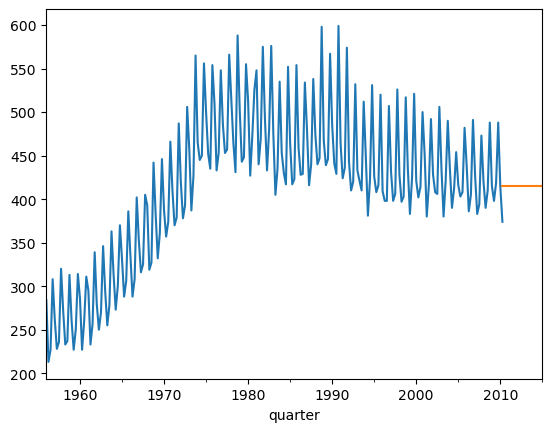

In [3]:
pred = pd.DataFrame(
    {'production': beer.production.mean()},
    index=future)

beer.production.plot()
pred.production.plot()

## 단순 기법

모든 예측값을 단순하게 마지막 값으로

데이터가 랜덤 워크(random walk)할 때 최적 예측치

<Axes: xlabel='quarter'>

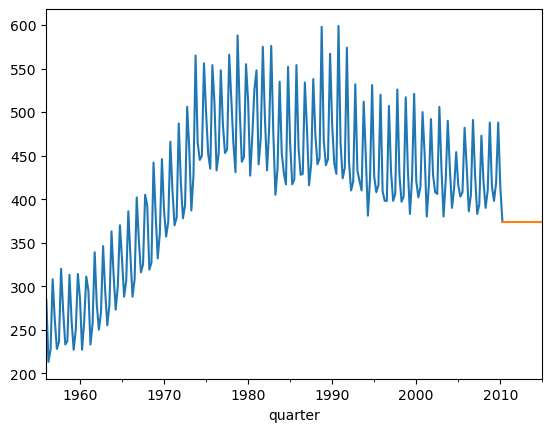

In [5]:
pred = pd.DataFrame(
    {'production': beer.production.iloc[-1]},
    index=future)

beer.production.plot()
pred.production.plot()

## 계절성 단순 기법

마지막 동일 계절의 값을 사용

In [10]:
import numpy as np
seasonal = np.tile(beer.production.iloc[-4:], 5)

`np.tile(A, r)`: 주어진 A를 r번 반복

`[-4:]`: 마지막 4개의 값

<Axes: xlabel='quarter'>

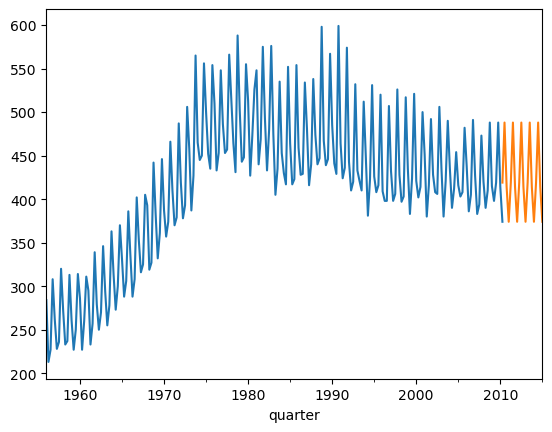

In [11]:
pred = pd.DataFrame({'production': seasonal}, index=future)
beer.production.plot()
pred.production.plot()

## 표류 기법

과거 데이터에 나타난 평균 변화량을 적용

평균 변화량 계산

In [8]:
num = len(beer.production) - 1
drift = (beer.production .iloc[-1] - beer.production .iloc[0]) / num

예측

<Axes: xlabel='quarter'>

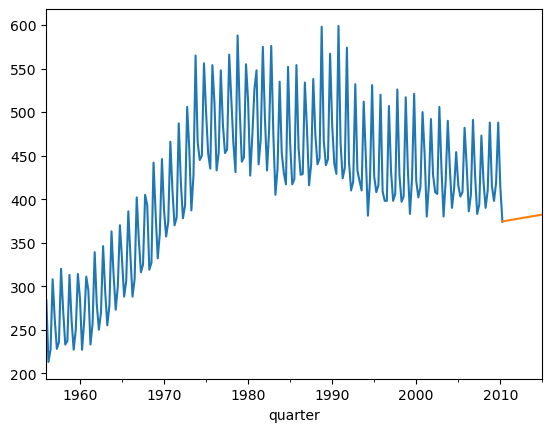

In [9]:
last = beer.production.iloc[-1]
pred = pd.DataFrame(
    {'production': last + np.arange(1, 21) * drift},
    index=future)

beer.production.plot()
pred.production.plot()

## 표류와 계절성 단순 기법의 결합

<Axes: xlabel='quarter'>

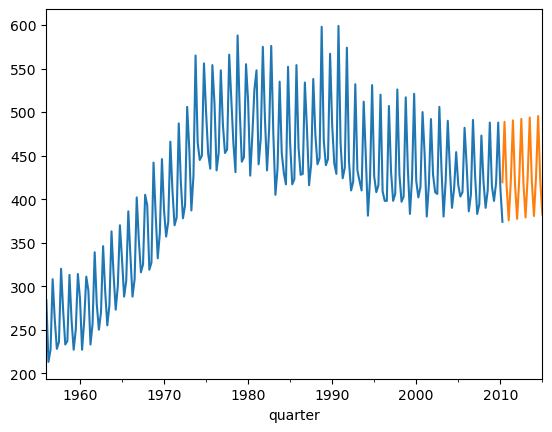

In [12]:
pred = pd.DataFrame(
    {'production': seasonal + np.arange(1, 21) * drift},
    index=future)

beer.production.plot()
pred.production.plot()